In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
pd = pd.read_csv('shoes_data2.csv.csv')

In [5]:
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['price', 'availability']
target = 'weight'

# Drop rows with missing target values
data = pd.dropna(subset=[target])

# Extract features and target
X = data[features].values
y = data[target].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add a column of ones to X for the bias term
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Initialize parameters
theta = np.zeros(X_normalized.shape[1])
learning_rate = 0.01
num_iterations = 1000

# Gradient descent algorithm
for i in range(num_iterations):
    predictions = X_normalized.dot(theta)
    errors = predictions - y
    gradient = X_normalized.T.dot(errors) / len(y)
    theta -= learning_rate * gradient

print("Trained parameters:", theta)

Trained parameters: [319.47874388  22.69758278 -10.70628689]


In [6]:
# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Calculate the cost using the current theta
cost = compute_cost(X_normalized, y, theta)
print("Cost:", cost)

Cost: 51035.13961294189


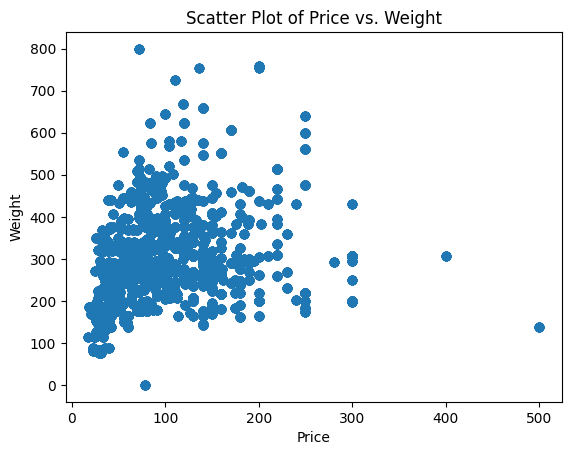

In [12]:
# Remove the outlier
data = data[data['weight'] < 1000]

# Create a scatter plot of price vs. weight
plt.scatter(data['price'], data['weight'])
plt.xlabel('Price')
plt.ylabel('Weight')
plt.title('Scatter Plot of Price vs. Weight')
plt.show()